In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the data:
df=pd.read_csv(r"C:\Users\acer\OneDrive\Desktop\Note\Statistics and R\Vizualization\Lab_export\Naive Bayes classifier\Bank_Data.csv")

In [3]:
df.shape

(4521, 16)

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,may,226,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   month      4521 non-null   object
 10  duration   4521 non-null   int64 
 11  campaign   4521 non-null   int64 
 12  pdays      4521 non-null   int64 
 13  previous   4521 non-null   int64 
 14  poutcome   4521 non-null   object
 15  y          4521 non-null   object
dtypes: int64(6), object(10)
memory usage: 565.2+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,4521.0,41.170095,10.576211,19.0,33.0,39.0,49.0,87.0
balance,4521.0,1422.657819,3009.638142,-3313.0,69.0,444.0,1480.0,71188.0
duration,4521.0,263.961292,259.856633,4.0,104.0,185.0,329.0,3025.0
campaign,4521.0,2.793630,3.109807,1.0,1.0,2.0,3.0,50.0
pdays,4521.0,39.766645,100.121124,-1.0,-1.0,-1.0,-1.0,871.0
previous,4521.0,0.542579,1.693562,0.0,0.0,0.0,0.0,25.0


In [7]:
df.describe()

,age,balance,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,3025.000000,50.000000,871.000000,25.000000


In [8]:
df.describe(include='O').T

,count,unique,top,freq
job,4521,12,management,969
marital,4521,3,married,2797
education,4521,4,secondary,2306
default,4521,2,no,4445
housing,4521,2,yes,2559
loan,4521,2,no,3830
contact,4521,3,cellular,2896
month,4521,12,may,1398
poutcome,4521,4,unknown,3705
y,4521,2,no,4000


In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
round(100*(df.isnull().sum())/len(df.index),2)

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

In [11]:
df['job'].value_counts()

management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64

In [12]:
df['marital'].value_counts()

married     2797
single      1196
divorced     528
Name: marital, dtype: int64

In [13]:
df['education'].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

In [14]:
df['default'].value_counts()

no     4445
yes      76
Name: default, dtype: int64

In [15]:
df['housing'].value_counts()

yes    2559
no     1962
Name: housing, dtype: int64

In [16]:
df['loan'].value_counts()

no     3830
yes     691
Name: loan, dtype: int64

In [17]:
df['contact'].value_counts()

cellular     2896
unknown      1324
telephone     301
Name: contact, dtype: int64

In [18]:
df['month'].value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

In [19]:
df['poutcome'].value_counts()

unknown    3705
failure     490
other       197
success     129
Name: poutcome, dtype: int64

In [20]:
df['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

In [21]:
# Label Encoder:
from sklearn.preprocessing import LabelEncoder

In [22]:
le=LabelEncoder()

In [23]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'y'],
      dtype='object')

In [24]:
cat_var=df.select_dtypes(include='O')

In [25]:
cat_var

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,unemployed,married,primary,no,no,no,cellular,oct,unknown,no
1,services,married,secondary,no,yes,yes,cellular,may,failure,no
2,management,single,tertiary,no,yes,no,cellular,apr,failure,no
3,management,married,tertiary,no,yes,yes,unknown,jun,unknown,no
4,blue-collar,married,secondary,no,yes,no,unknown,may,unknown,no
...,...,...,...,...,...,...,...,...,...,...
4516,services,married,secondary,no,yes,no,cellular,jul,unknown,no
4517,self-employed,married,tertiary,yes,yes,yes,unknown,may,unknown,no
4518,technician,married,secondary,no,no,no,cellular,aug,unknown,no
4519,blue-collar,married,secondary,no,no,no,cellular,feb,other,no


In [26]:
for col in cat_var:
    df[col]=le.fit_transform(df[col])

In [27]:
df

,age,job,marital,education,default,balance,housing,loan,contact,month,duration,campaign,pdays,previous,poutcome,y
0,30,10,1,0,0,1787,0,0,0,10,79,1,-1,0,3,0
1,33,7,1,1,0,4789,1,1,0,8,220,1,339,4,0,0
2,35,4,2,2,0,1350,1,0,0,0,185,1,330,1,0,0
3,30,4,1,2,0,1476,1,1,2,6,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,8,226,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,7,1,1,0,-333,1,0,0,5,329,5,-1,0,3,0
4517,57,6,1,2,1,-3313,1,1,2,8,153,1,-1,0,3,0
4518,57,9,1,1,0,295,0,0,0,1,151,11,-1,0,3,0
4519,28,1,1,1,0,1137,0,0,0,3,129,4,211,3,1,0


In [28]:
df.shape

(4521, 16)

In [29]:
x=df.drop('y',axis=1)
y=df['y']

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [32]:
X_train.shape

(3164, 15)

In [33]:
X_test.shape

(1357, 15)

In [34]:
y_train.shape

(3164,)

In [35]:
y_test.shape

(1357,)

In [36]:
print(y_train.value_counts())

0    2795
1     369
Name: y, dtype: int64


In [37]:
print(y_test.value_counts())

0    1205
1     152
Name: y, dtype: int64


In [38]:
from sklearn.preprocessing import MinMaxScaler

In [39]:
scaler=MinMaxScaler()

In [40]:
X_train_scaled=scaler.fit_transform(X_train)

In [41]:
df_1=pd.DataFrame(X_train_scaled)

In [42]:
df_1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.338235,0.818182,0.5,0.333333,0.0,0.075107,1.0,0.0,0.0,0.272727,0.002894,0.081633,0.0,0.0,1.0
1,0.205882,0.090909,0.5,0.333333,0.0,0.057344,1.0,0.0,0.0,0.454545,0.052822,0.040816,0.0,0.0,1.0
2,0.191176,0.363636,1.0,0.666667,0.0,0.082529,1.0,1.0,0.0,0.000000,0.051737,0.020408,0.0,0.0,1.0
3,0.132353,0.818182,1.0,0.333333,0.0,0.073355,1.0,0.0,0.0,0.727273,0.003618,0.122449,0.0,0.0,1.0
4,0.250000,0.818182,0.5,0.333333,0.0,0.262773,1.0,0.0,1.0,0.727273,0.077424,0.061224,0.0,0.0,1.0


In [43]:
X_test_scaled=scaler.transform(X_test)

In [44]:
df_2=pd.DataFrame(X_test_scaled)

In [45]:
df_2.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.470588,0.181818,0.5,0.333333,1.0,-0.011544,0.0,1.0,0.0,0.454545,0.042692,0.102041,0.00000,0.000000,1.000000
1,0.455882,0.363636,0.5,0.666667,0.0,0.158976,0.0,0.0,0.0,0.090909,0.182706,0.020408,0.00344,0.208333,0.333333
2,0.455882,0.818182,0.5,0.333333,0.0,0.108504,0.0,0.0,0.0,0.090909,0.045586,0.040816,0.00000,0.000000,1.000000
3,0.264706,0.363636,0.5,0.666667,0.0,0.059990,1.0,0.0,1.0,0.545455,0.087554,0.244898,0.00000,0.000000,1.000000
4,0.176471,0.000000,1.0,0.333333,0.0,0.085999,0.0,0.0,0.0,0.272727,0.122287,0.020408,0.00000,0.000000,1.000000


In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
lr=LogisticRegression()

In [48]:
lr_model=lr.fit(df_1,y_train)

In [49]:
lr_model

LogisticRegression()

In [50]:
y_pred=lr_model.predict(df_2)

In [51]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [52]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report

In [53]:
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(f1_score(y_test,y_pred))

0.8872512896094326
0.4883720930232558
0.13815789473684212
0.21538461538461542


In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1205
           1       0.49      0.14      0.22       152

    accuracy                           0.89      1357
   macro avg       0.69      0.56      0.58      1357
weighted avg       0.85      0.89      0.86      1357



In [55]:
from sklearn.naive_bayes import GaussianNB

In [56]:
nb=GaussianNB()

In [57]:
nb_model=nb.fit(df_1,y_train)

In [58]:
nb_model

GaussianNB()

In [59]:
y_pred=nb_model.predict(df_2)

In [60]:
y_pred

array([1, 1, 0, ..., 1, 0, 0])

In [61]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      1205
           1       0.30      0.47      0.36       152

    accuracy                           0.82      1357
   macro avg       0.61      0.66      0.63      1357
weighted avg       0.86      0.82      0.83      1357



In [62]:
from sklearn.metrics import roc_curve,auc

In [63]:
fpr,tpr,threshold=roc_curve(y_test,y_pred)
roc_auc=auc(fpr,tpr)

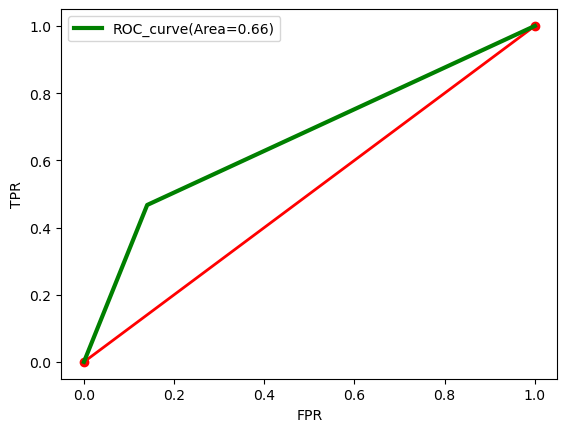

In [65]:
plt.plot([0,1],[0,1],color='red',linewidth=2,marker='o')
plt.plot(fpr,tpr,color='green',linewidth=3,label="ROC_curve(Area=%0.2f)"%roc_auc)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()